In [83]:
import random
from math import sqrt
import matplotlib.pyplot as plt
import time
from functools import reduce
from sympy.ntheory.modular import crt
from math import gcd
import sympy.ntheory as nt
from Cryptodome.Util import number

%matplotlib inline

In [84]:
def gcd(a, b):

    while b != 0:
        temp = b
        b = a % b
        a = temp

    return a

In [85]:
# find the inverse of a number
def inverse_mod(a, m):

    if gcd(a, m) != 1:
        return None
    
    # Calculate using the Extended Euclidean Algorithm:
    u1, u2, u3 = 1, 0, a
    v1, v2, v3 = 0, 1, m
    
    while v3 != 0:
        q = u3 // v3 
        v1, v2, v3, u1, u2, u3 = (u1 - q * v1), (u2 - q * v2), (u3 - q * v3), v1, v2, v3

    return u1 % m

In [86]:
#generata public and private keys for RSA
def generate_key_pair(number_of_bits):

    # Generate two large random prime numbers p and q
    p = number.getPrime(number_of_bits)
    q = number.getPrime(number_of_bits)

    while ( q == p):
        q = number.getPrime(number_of_bits)
    
    # Compute n = p * q
    # Compute phi(n) = (p - 1) * (q - 1)
    n = p * q
    phi = (p - 1) * (q - 1)
    
    # Find an integer e such that 1 < e < phi and gcd(e, phi) = 1
    while True:
        e = random.randrange(2 ** number_of_bits, phi)
        if gcd(e, phi) == 1:
            break
    
    # Compute d such that e * d ≡ 1 (mod phi)
    d = inverse_mod(e, phi)
    
    # Return the public key (n, e) and the private key (n, d)
    return (n, e), (n, d)

In [87]:
alphabet = '0123456789abcdefghijklmnopqrstuvwxyz '

In [88]:
# convert a message to a number
def encode_message(msg):

    # Convert any extra characters to spaces
    msg = msg.lower()
    msg = ''.join([c if c in alphabet else ' ' for c in msg])

    # Group the plaintext into sets of five characters per group
    groups = [msg[i:i+5] for i in range(0, len(msg), 5)]

    # Append space to the last group if it's not exactly five characters
    if len(groups[-1]) < 5:
        groups[-1] += ' '*(5-len(groups[-1]))

    # Convert each group into a separate number
    num = 0
    for group in groups:
        for c in group:
            num *= 37
            num += alphabet.index(c)

    return num

In [89]:
# convert a number to a message
def decode_message(num):
    
    nums = []
    
    while num > 0:
        nums.append(num % 37)
        num //= 37
    plaintext = ''.join(alphabet[num] for num in nums[::-1])
    
    return plaintext.rstrip()

In [90]:
# encrypt a message
def encrypt(plaintext, public_key):
    
    n, e = public_key
    num = encode_message(plaintext)

    # num ^ e mod n
    return pow(num, e, n)

In [91]:
# decrypt a message
def decrypt(ciphertext, private_key):

    n, d = private_key  
    # ciphertext ^ d mod n
    num = pow(ciphertext, d, n)

    return decode_message(num)

In [127]:
# test the functions
def test():

    # Generate key pair
    public_key, private_key = generate_key_pair(1024)
    
    # Encrypt a message
    plaintext = 'Karim Mahmoud Kamal Mohamed'
    ciphertext = encrypt(plaintext, public_key)
    print('Ciphertext:', ciphertext)
    
    # Decrypt the message
    decrypted_plaintext = decrypt(ciphertext, private_key)
    print('Decrypted plaintext:', decrypted_plaintext)

In [128]:
test()

Ciphertext: 2705223844035152853125774423054289646957045764424038973054571361240892075944457561060104909291264974859640875366555637045527652483632526494424598394434287907458691463400493545739391009568521265484506611336150981653453547259224105465897427511076125811172982109978071751662804919219750730867282199942855693299538225002536654381557519825141492005818354077457738017441774513288383155965851343022694311839803543464751261924224510227535229959616181114176932322086446428587762786034192241153503500865939877018627810629127308504700917185270615055975960185915965334663921473733906019857851983002334173287599570408919423137236
Decrypted plaintext: karim mahmoud kamal mohamed


In [104]:
# break RSA using the brute force method
def break_rsa(public_key):

    n, e = public_key
    p = 0
    q = 0
    
    for i in range(2, int (sqrt(n)+1)):
        if n % i == 0:
            p = i
            q = n // i
            break
    
    phi = (p - 1) * (q - 1)
    d = inverse_mod(e, phi)
    
    return (n, d)  

In [121]:
# A graph consisting of the number of bits in generated_key_pair on x axis and the time it takes to break RSA on y axis
def break_rsa_graph():
    x = []
    y1 = []
    
    for i in range(3, 32):
        public_key, private_key = generate_key_pair(i)
        start_break = time.time()
        print('break_rsa(public_key):', break_rsa(public_key))
        end_break = time.time()
        
        x.append(i)
        y1.append(end_break - start_break)

    plt.xlabel('Number of bits')
    plt.ylabel('Attack Time')
    plt.plot(x, y1)
    plt.show()
    plt.figure(1) 

In [122]:

# A graph consisting of the number of bits in generated_key_pair on x axis and the time it takes to encrypt a message of 5 characters on y axis
def graph():
    x = []
    y1 = []
    y2 = []

    for i in range(3, 1024):

        public_key, private_key = generate_key_pair(i)

        start_enc = time.time()
        encry = encrypt('hi s7', public_key)
        end_enc = time.time()
        
        start_dec = time.time()
        decrypt(encry, private_key)
        end_dec = time.time()
        
        x.append(i)
        y1.append(end_enc - start_enc)
        y2.append(end_dec - start_dec)
        
    plt.xlabel('Number of bits')
    plt.ylabel('Encryption Time')
    plt.plot(x, y1)
    plt.show()
    plt.figure(1)

    plt.xlabel('Number of bits')
    plt.ylabel('Decryption Time')
    plt.plot(x, y2)
    plt.show()
    plt.figure(2)

In [123]:
#if __name__ == '__main__':
    #test()
# if Brute force : 32 bit
# if prime fac : 64 bit
#generate_key_pair()
#public_key, private_key = generate_key_pair(25)
#print('public_key:', public_key)
#print('private_key:', private_key)
#print('break_rsa(public_key):', break_rsa(public_key))
#break_rsa_graph()


break_rsa(public_key): (35, 19)
break_rsa(public_key): (143, 29)
break_rsa(public_key): (323, 13)
break_rsa(public_key): (1591, 1487)
break_rsa(public_key): (7031, 5333)
break_rsa(public_key): (30997, 1415)
break_rsa(public_key): (116939, 50527)
break_rsa(public_key): (496411, 381367)
break_rsa(public_key): (1515037, 935593)
break_rsa(public_key): (9655939, 3226051)
break_rsa(public_key): (40457369, 25433399)
break_rsa(public_key): (116139203, 91274957)
break_rsa(public_key): (693188017, 596018519)
break_rsa(public_key): (2665184657, 1366095433)
break_rsa(public_key): (13797403043, 164210711)
break_rsa(public_key): (40781547659, 3775264259)
break_rsa(public_key): (121606459151, 96670381231)
break_rsa(public_key): (338054113169, 258803559983)
break_rsa(public_key): (2512726123667, 1352238967247)
break_rsa(public_key): (11924487946559, 8654550791531)
break_rsa(public_key): (34461070302691, 23441557205699)
break_rsa(public_key): (100173499162819, 29118704076757)
break_rsa(public_key): (58

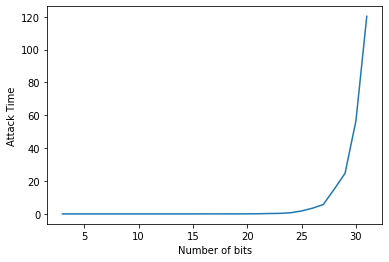

<Figure size 432x288 with 0 Axes>

In [124]:
break_rsa_graph()

7
5
(35, 13)
(35, 13)
0.0
0.0009999275207519531
11
13
(143, 109)
(143, 109)
0.0
0.0
29
19
(551, 397)
(551, 325)
0.0
0.0
37
43
(1591, 319)
(1591, 583)
0.0
0.0
71
103
(7313, 5903)
(7313, 4127)
0.0
0.0
223
251
(55973, 36169)
(55973, 28429)
0.0
0.0
269
487
(131003, 29921)
(131003, 81929)
0.0
0.0
911
727
(662297, 114251)
(662297, 123671)
0.0
0.0
1231
2017
(2482927, 523147)
(2482927, 640483)
0.0
0.0
2957
2179
(6443303, 2692409)
(6443303, 3290681)
0.0
0.0
5381
7681
(41331461, 34108589)
(41331461, 27311909)
0.0
0.0
8363
10631
(88907053, 4471517)
(88907053, 63603613)
0.0
0.0
28933
20023
(579325459, 417799867)
(579325459, 344806891)
0.0
0.0
34123
36067
(1230714241, 1006319275)
(1230714241, 773940451)
0.0
0.0
81931
127373
(10435797263, 5134417511)
(10435797263, 9358848071)
0.0
0.0
259201
169823
(44018291423, 1145504339)
(44018291423, 20697117659)
0.0
0.0
431597
304709
(131511490273, 124196963171)
(131511490273, 95562766059)
0.0
0.0
710483
675239
(479745830437, 45339445167)
(479745830437, 49948315

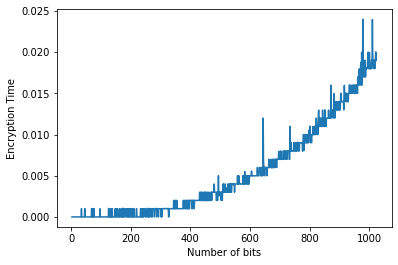

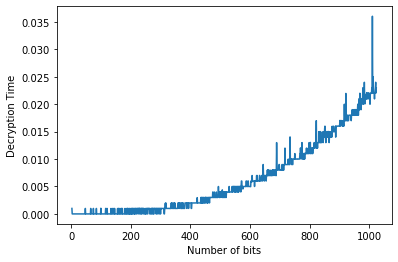

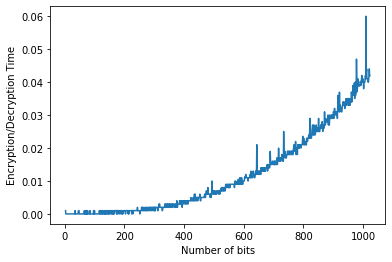

<Figure size 432x288 with 0 Axes>

In [ ]:
graph()